In [2]:
import numpy as np
import scipy, scipy.linalg, scipy.signal
import matplotlib.pyplot as plt
import pickle
import pylab
pylab.rcParams['figure.figsize'] = (14.0, 8.0)

%matplotlib inline

# Préliminaires

**Comment calculer l’estimation de l’inter-corrélation de deux signaux `x` et `y` en python ?**

```python
n = 10

# regularisation par le nombre de termes
regul = np.correlate(np.ones(n), np.ones(n), "full")

# corrélation
corr = np.correlate(x, y, "full") / regul

# Récupération de RXY[0]
RXY0 = corr[n-1]
```

**Comment utiliser la fonction `scipy.signal.lfilter` avec les coefficients h d’un RIF obtenus pour Wiener ou Yule-Walker ?**

`scipy.signal.lfilter(b, a, x, axis=-1, zi=None)`

a = [1]  
b = h

**Comment calculer une toeplitz ou une matrice inverse grâce à `scipy.linalg` ?**

`scipy.linalg.toeplitz` et `scipy.linalg.inv`.

In [3]:
# Load data

dataAll = pickle.load(open('TDWiener.pick', 'rb'))

# Filtrage

In [41]:
data = dataAll['EX1']

xtrain = data['train']['x']
ytrain = data['train']['y']
btrain = data['train']['b']
ytest = data['test']['y']

## Wiener : Forme générale

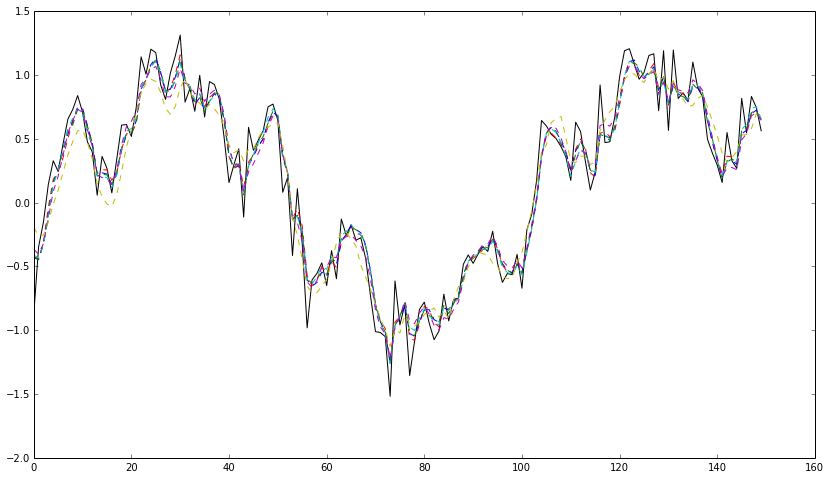

In [42]:
n = np.size(ytrain)

# plot original data
plt.plot(ytest[0:150], 'k')

# for each p
for (p, color) in zip([2, 5, 7, 10, 20, 30], ['r--', 'b--', 'g--', 'c--', 'm--', 'y--']):
    
    # compute correlations
    regul = np.correlate(np.ones(n), np.ones(n), "full")
    RYY = np.correlate(ytrain, ytrain, "full") / regul
    RXY = np.correlate(xtrain, ytrain, "full") / regul

    RYYmat = scipy.linalg.toeplitz(RYY[n-1:n+p+1])
    RXY = RXY[n-1:n+p+1]

    h = np.dot(np.linalg.inv(RYYmat), RXY)

    xtest = scipy.signal.lfilter(h, [1], ytest)
    plt.plot(xtest[0:150], color)

## Wiener : Bruit non-corrélé

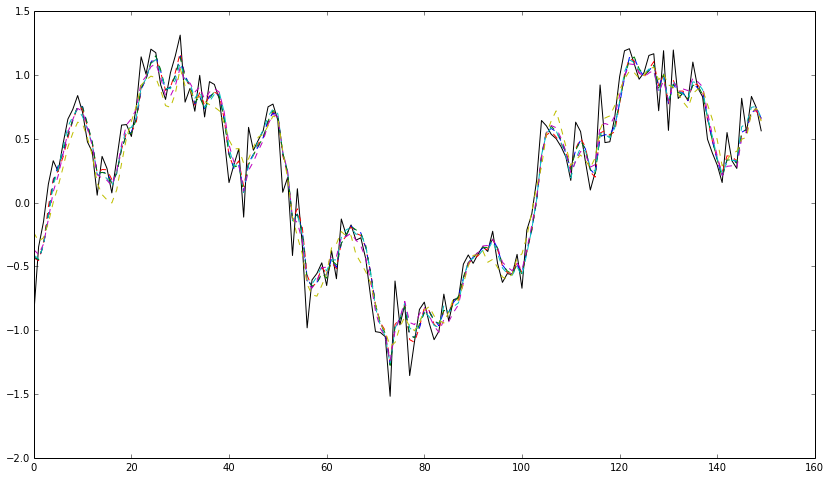

In [34]:
n = np.size(ytrain)

# plot original data
plt.plot(ytest[0:150], 'k')

# for each p
for (p, color) in zip([2, 5, 7, 10, 20, 30], ['r--', 'b--', 'g--', 'c--', 'm--', 'y--']):
    
    regul = np.correlate(np.ones(n), np.ones(n), "full")
    RX = np.correlate(xtrain, xtrain, "full") / regul
    RB = np.correlate(btrain, btrain, "full") / regul

    RXmat = scipy.linalg.toeplitz(RX[n-1:n+p+1])
    RBmat = scipy.linalg.toeplitz(RB[n-1:n+p+1])
    RXpBmat = RXmat + RBmat
    RX = RX[n-1:n+p]

    h = np.dot(np.linalg.inv(RXpBmat), RX)

    xtest = scipy.signal.lfilter(h, [1], ytest)
    plt.plot(xtest[0:150], color)

# Prédiction (Yule-Walker)

In [62]:
data = dataAll['EX2']
ytest = data['test']['y']
ytrain = data['train']['y']

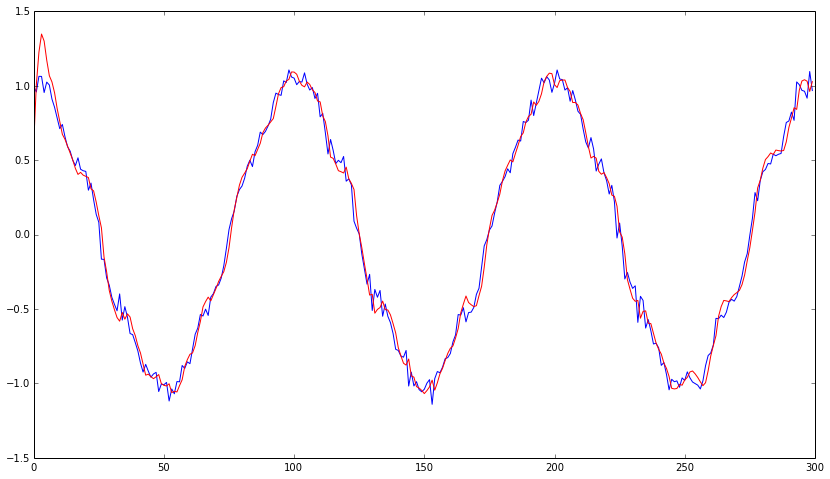

In [86]:
n = np.size(ytrain)
p = 10

# compute correlations
regul = np.correlate(np.ones((n,)), np.ones((n,)), "full")
RYYnc = np.correlate(ytrain, ytrain, "full")
RYYfull = RYYnc / regul
RYY = RYYfull[n-1:]

RYYmat = scipy.linalg.toeplitz(RYY[:p])
RYY1p = RYY[1:p+1] # 1 à p

h = np.linalg.inv(RYYmat).dot(RYY1p)
h = h.reshape((p,))

xtest = scipy.signal.lfilter(h, [1], ytest)
plt.plot(ytest[1:301], 'b')
plt.plot(xtest[0:300], 'r')

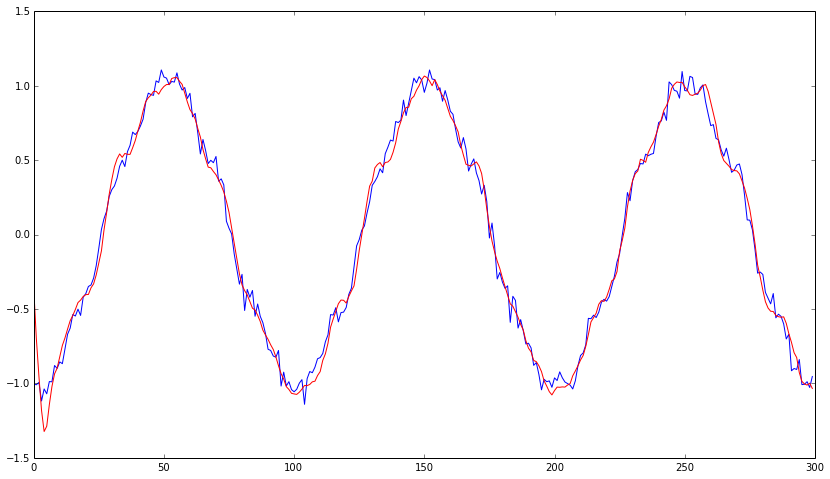

In [87]:
n = np.size(ytrain)
p = 10
n0 = 50

# compute correlations
regul = np.correlate(np.ones((n,)), np.ones((n,)), "full")
RYYnc = np.correlate(ytrain, ytrain, "full")
RYYfull = RYYnc / regul
RYY = RYYfull[n-1:]

RYYmat = scipy.linalg.toeplitz(RYY[:p])
RYY1p = RYY[n0:p+n0] # n0 à p + n0 - 1

h = np.linalg.inv(RYYmat).dot(RYY1p)
h = h.reshape((p,))

xtest = scipy.signal.lfilter(h, [1], ytest)
plt.plot(ytest[n0:300+n0], 'b')
plt.plot(xtest[0:300], 'r')

# La vie la vraie

In [19]:
import cvxpy as cvx

C:\Anaconda\lib\site-packages\cvxpy\problems\problem.py:49: UserWarning: The solver SCS could not be imported.
  warnings.warn("The solver SCS could not be imported.")


In [ ]:


A = np.ones(n,m)
b = np.zeros()

A[:,0] = t
b[:,0] = y



In [25]:
ytest = dataAll['EX3']['test']['y']

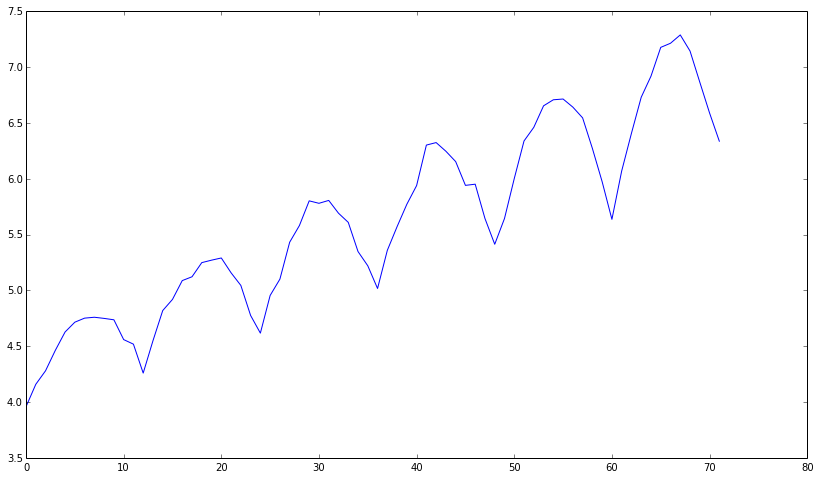